In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("data_clean.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [6]:
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
data["Temp C"].value_counts()

,count
Temp C,
81,11
76,10
82,9
77,8
86,7
78,6
79,6
73,5
67,5


In [10]:
data["Month"].value_counts()

,count
Month,
9,34
5,31
8,31
7,31
6,30
May,1


In [12]:
data["Temp C"]=pd.to_numeric(data["Temp C"],errors="coerce")

In [13]:
data["Month"]=pd.to_numeric(data["Month"],errors="coerce")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      157 non-null    float64
 5   Month       157 non-null    float64
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 12.5+ KB


In [17]:
data.drop("Temp C",axis=1,inplace=True)

In [18]:
data.isnull().sum()

,0
Unnamed: 0,0
Ozone,38
Solar.R,7
Wind,0
Month,1
Day,0
Year,0
Temp,0
Weather,3


In [46]:
data.rename(columns={"Solar.R":"Solar","Temp":"Temperature"},inplace=True)

In [47]:
data.isnull().sum()

,0
Unnamed: 0,0
Ozone,38
Solar,7
Wind,0
Month,1
Day,0
Year,0
Temperature,0
Weather,3


In [49]:
import numpy as np

In [48]:
data.replace(r"^\s*(NA|N\A|null|none)\s*$",np.nan,regex=True,inplace=True)

In [50]:
data.isnull().sum()

,0
Unnamed: 0,0
Ozone,38
Solar,7
Wind,0
Month,1
Day,0
Year,0
Temperature,0
Weather,3


In [51]:
import matplotlib.pyplot as plt

<Axes: >

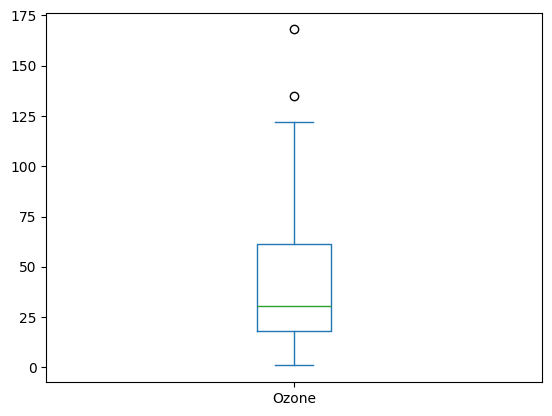

In [52]:
data["Ozone"].plot(kind="box")

In [64]:
oz_med=data["Ozone"].median()

In [65]:
data["Ozone"]=data["Ozone"].fillna(oz_med)

<Axes: >

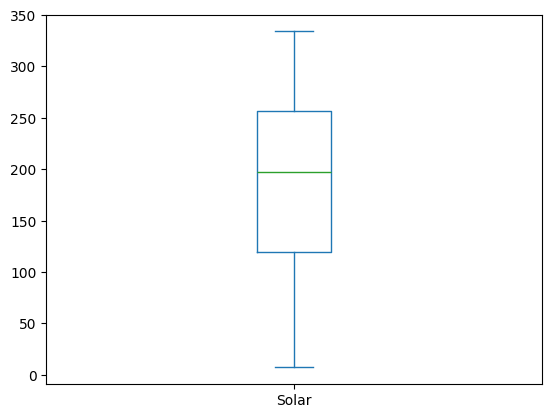

In [53]:
data["Solar"].plot(kind="box")

In [66]:
solar_mean=data["Solar"].mean()

In [67]:
data["Solar"]=data["Solar"].fillna(solar_mean)

<Axes: >

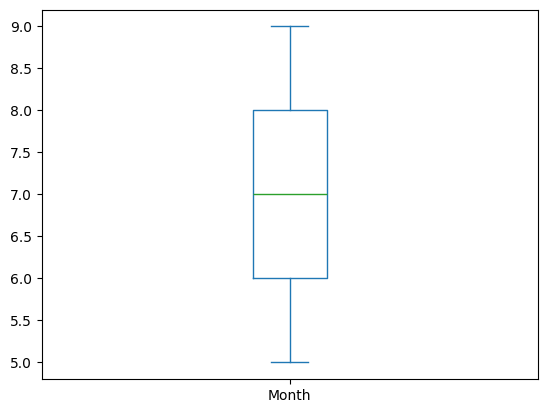

In [54]:
data["Month"].plot(kind="box")

In [68]:
month_mean=data["Month"].mean()

In [69]:
data["Month"]=data["Month"].fillna(month_mean)

In [70]:
data["Weather"]=data["Weather"].fillna(data["Weather"].mode()[0])

In [71]:
data.isnull().sum()

,0
Unnamed: 0,0
Ozone,0
Solar,0
Wind,0
Month,0
Day,0
Year,0
Temperature,0
Weather,0


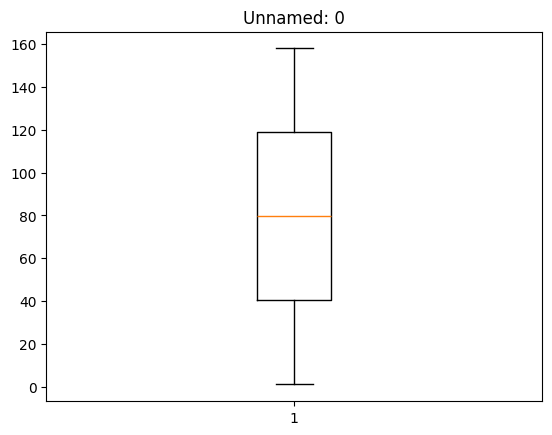

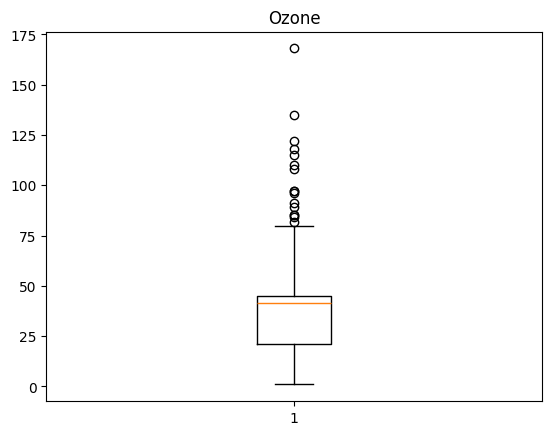

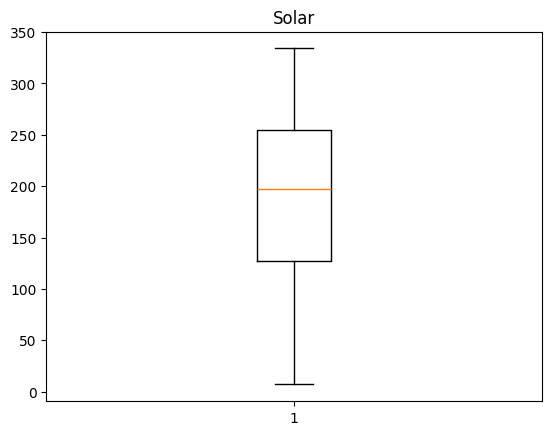

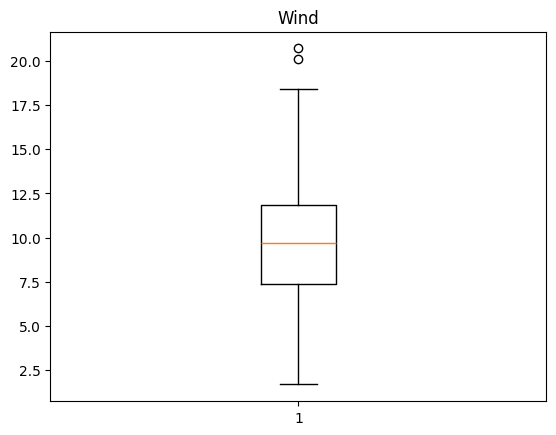

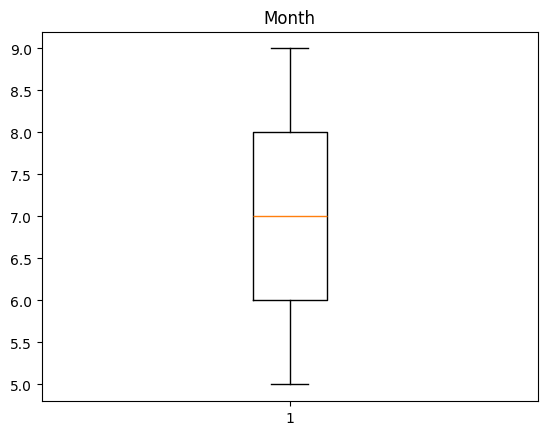

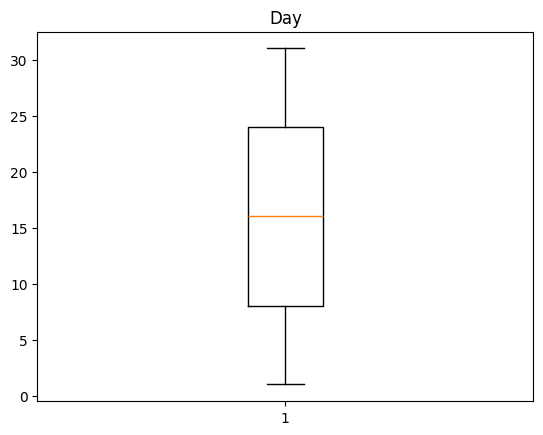

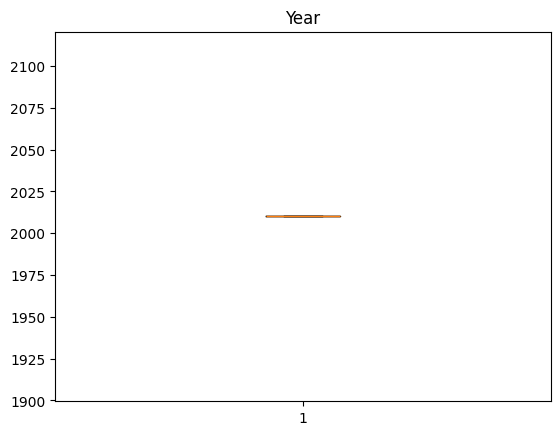

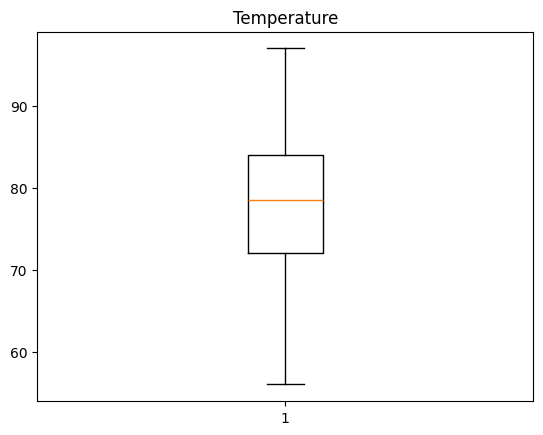

In [72]:
for i in data.columns:
  if data[i].dtype!=object:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [73]:
Q3=data["Ozone"].quantile(0.75)
Q1=data["Ozone"].quantile(0.25)
IQR=Q3-Q3
UE=Q3+1.5*IQR
LE=Q1-1.5*IQR


In [77]:
data.loc[data["Ozone"]>UE,"Ozone"]=UE
data.loc[data["Ozone"]<LE,"Ozone"]=LE